In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs_training = reload_module('analyse_results', 'Graphs_training')
Results = reload_module('analyse_results', 'Results')

train_info = Graphs_training()

### Sequential ODE solver for all model types:
#### `1`
* pyomo + sequential
* jax + sequential
* pytorch + sequential
#### `2`
* regular pretraining pytorch
* pyomo-pretraining pytorch

`pyomo + sequential`

In [15]:
fn = 'results/convergence_2024-09-02_17-14-25_full.pkl'
#fn = 'results/convergence_2024-09-02_17-22-56_full.pkl'
pyomo_convergence = Results.load_results(fn)

keys = {k:k for k in pyomo_convergence[(1,'2015-01-10')].keys()}
pyomo_df = Results.collect_data(pyomo_convergence, keys)
# clean up the lists format
pyomo_df = pyomo_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pyomo_df['i'] = 1
time_elpased = pyomo_df['times_elapsed'].values[-1]
pyomo_df = pyomo_df.groupby('i').agg(list)
pyomo_df['times_elapsed'] = time_elpased

pyomo_df.rename(columns={'times_elapsed':'time_elapsed', 'mse_coll_ode': 'training_loss'}, inplace=True)
Graphs_training.prepare_timings_general(pyomo_df)

,result,time_elapsed,mse_odeint,training_loss,mse_odeint_test,mse_coll_ode_test,times
i,,,,,,,
1,"[{'solver_time': 0.1181650161743164, 'terminat...",17.985626,"[1.5230835970105254, 0.545184269219303, 0.4952...","[1.3529688740399104, 0.5312871291634949, 0.491...","[1.8174085867051923, 6.3695868616121345, 6.921...","[1.9907171382795241, 6.967718022144031, 7.3431...","[0.0, 0.2606612495754076, 0.5213224991508152, ..."


`jax + sequential` (no pretraining)

In [298]:
fn = 'results/convergence_jax_no_pretrain_2024-09-02_19-03-47_full.pkl'
fn = 'results/convergence_jax_no_pretrain_2024-09-03_12-34-34_full.pkl'
jax_convergence = Results.load_results(fn)

jax_convergence[(1,'2015-01-10')]['training_losses'] = jax_convergence['training_losses'][0][0]
keys = {k:k for k in jax_convergence[(1,'2015-01-10')].keys()}
del jax_convergence['training_losses']
jax_df = Results.collect_data(jax_convergence, keys)

jax_df = jax_df.map(lambda x: x[0] if isinstance(x, list) else x) 
jax_df['testing_loss'] = jax_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
jax_df['training_loss'] = jax_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
jax_df.drop(columns=['training_losses'], inplace=True)

jax_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
jax_df['time_elapsed'] = 17.372
jax_df_no_pretrain = jax_df.copy()
Graphs_training.prepare_timings_general(jax_df_no_pretrain)
jax_df_no_pretrain

,time_elapsed,mse_diffrax,mse_diffrax_test,testing_loss,training_loss,times
1,17.372,0.020203,0.095113,"[1.7662482047673036, 2.4198859514756608, 2.822...","[0.8000774547898939, 0.7501988340631139, 0.694...","[0.0, 0.08685999999999999, 0.17371999999999999..."


`jax + sequential` (with pretraining)

In [299]:
fn = 'results/convergence_jax_pretrain_2024-09-02_18-29-42_full.pkl'
jax_convergence = Results.load_results(fn)

In [300]:
fn = 'results/convergence_jax_pretrain_2024-09-02_18-29-42_full.pkl'
jax_convergence = Results.load_results(fn)

jax_convergence[(1,'2015-01-10')]['training_losses'] = jax_convergence['training_losses'][0][1]
keys = {k:k for k in jax_convergence[(1,'2015-01-10')].keys()}
del jax_convergence['training_losses']
jax_df = Results.collect_data(jax_convergence, keys)

jax_df = jax_df.map(lambda x: x[0] if isinstance(x, list) else x) 
jax_df['testing_loss'] = jax_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
jax_df['training_loss'] = jax_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
jax_df.drop(columns=['training_losses'], inplace=True)

jax_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
jax_df['time_elapsed'] = 13.4908
Graphs_training.prepare_timings_general(jax_df)

,time_elapsed,mse_diffrax,mse_diffrax_test,testing_loss,training_loss,times
1,13.4908,0.054559,0.161875,"[1.828463946223613, 1.5190349428334855, 1.3925...","[0.9242638205385313, 0.8777869544875023, 0.851...","[0.0, 0.067454, 0.134908, 0.202362, 0.269816, ..."


`pytroch + sequential` (no pretraining)

In [301]:
fn = 'results/pytorch_no_pretraining_2024-09-03_10-51-44_full.pkl'
# learning_rate = 1e-2
# weight_decay = 1e-3
# atol=1e-4
pt_convergence = Results.load_results(fn)
keys = {k:k for k in pt_convergence['2015-01-10'].keys()}
pt_df = Results.collect_data(pt_convergence, keys)

pt_df = pt_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pt_df['testing_loss'] = pt_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
pt_df['training_loss'] = pt_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
pt_df.drop(columns=['training_losses'], inplace=True)

pt_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
pt_df['time_elapsed'] = 32.3978
pt_df_no_pretrain = pt_df.copy()
Graphs_training.prepare_timings_general(pt_df_no_pretrain)

,mse_train,mse_test,time_elapsed,testing_loss,training_loss,times
2,0.07745,0.257671,32.3978,"[2.0968385, 1.7638173, 1.5439917, 1.4574082, 1...","[1.28294, 0.9417556, 0.8408028, 0.89249504, 0....","[0.0, 0.10799266666666665, 0.2159853333333333,..."


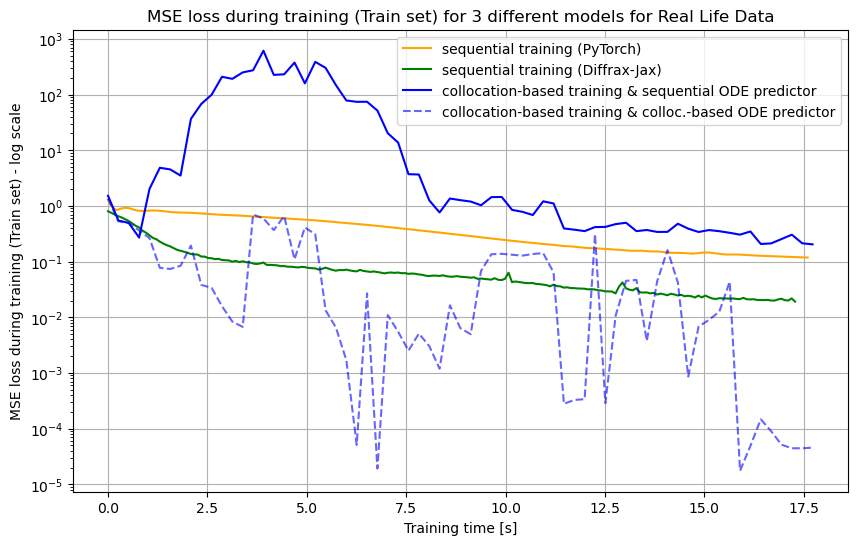

In [302]:
plt.figure(figsize=(10, 6))

plt.plot(pt_df_no_pretrain.times.item()[:164], pt_df_no_pretrain.training_loss.item()[:164], label='sequential training (PyTorch)', color='orange')
plt.plot(jax_df_no_pretrain.times.item(), jax_df_no_pretrain.training_loss.item(), label='sequential training (Diffrax-Jax)', color='green')
plt.plot(pyomo_df.times.item(), pyomo_df.mse_odeint.item(), label='collocation-based training & sequential ODE predictor', color='blue')
plt.plot(pyomo_df.times.item(), pyomo_df.training_loss.item(), label='collocation-based training & colloc.-based ODE predictor', color='blue', ls = '--', alpha = 0.6)

plt.title('MSE loss during training (Train set) for 3 different models for Real Life Data')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Train set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [303]:
display(pyomo_df)

,result,time_elapsed,mse_odeint,training_loss,mse_odeint_test,mse_coll_ode_test,times
i,,,,,,,
1,"[{'solver_time': 0.1181650161743164, 'terminat...",17.985626,"[1.5230835970105254, 0.545184269219303, 0.4952...","[1.3529688740399104, 0.5312871291634949, 0.491...","[1.8174085867051923, 6.3695868616121345, 6.921...","[1.9907171382795241, 6.967718022144031, 7.3431...","[0.0, 0.2606612495754076, 0.5213224991508152, ..."


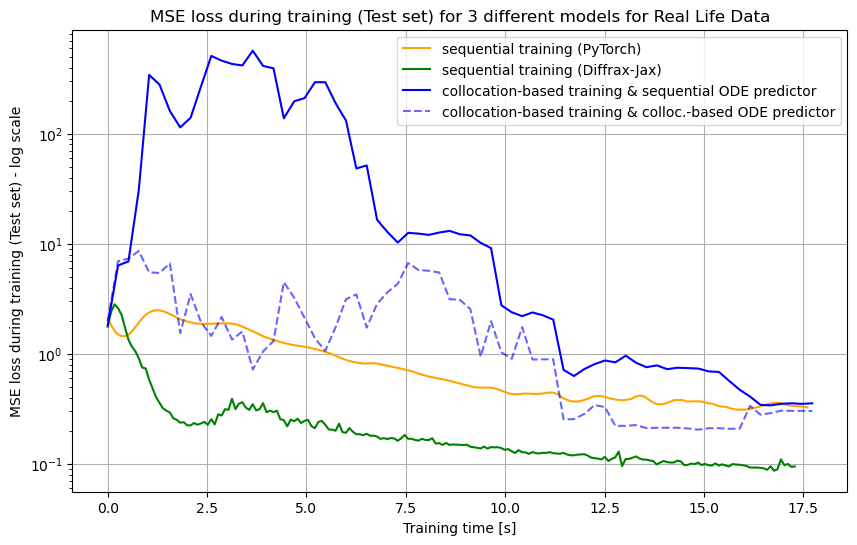

In [304]:
plt.figure(figsize=(10, 6))

plt.plot(pt_df_no_pretrain.times.item()[:164], pt_df_no_pretrain.testing_loss.item()[:164], label='sequential training (PyTorch)', color='orange')
plt.plot(jax_df_no_pretrain.times.item()[:264], jax_df_no_pretrain.testing_loss.item()[:264], label='sequential training (Diffrax-Jax)', color='green')
plt.plot(pyomo_df.times.item(), pyomo_df.mse_odeint_test.item(), label='collocation-based training & sequential ODE predictor', color='blue')
plt.plot(pyomo_df.times.item(), pyomo_df.mse_coll_ode_test.item(), label='collocation-based training & colloc.-based ODE predictor', color='blue', ls = '--', alpha = 0.6)

plt.title('MSE loss during training (Test set) for 3 different models for Real Life Data')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Test set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

`Pytorch with no pretraining and with pyomo-based weight initialization`

* `no-pretraining`

In [200]:
pt_df_no_pretrain

,mse_train,mse_test,time_elapsed,testing_loss,training_loss,times
2,0.07745,0.257671,32.3978,"[2.0968385, 1.7638173, 1.5439917, 1.4574082, 1...","[1.28294, 0.9417556, 0.8408028, 0.89249504, 0....","[0.0, 0.10799266666666665, 0.2159853333333333,..."


* `no-pretraining` 600 epochs

In [224]:
fn = 'results/pyomo_no_pretraining_600_2024-09-03_11-20-01_full.pkl'
pt_convergence = Results.load_results(fn)
keys = {k:k for k in pt_convergence['2015-01-10'].keys()}
pt_df = Results.collect_data(pt_convergence, keys)

pt_df = pt_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pt_df['testing_loss'] = pt_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
pt_df['training_loss'] = pt_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
pt_df.drop(columns=['training_losses'], inplace=True)

pt_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
pt_df['time_elapsed'] = 81.296
Graphs_training.prepare_timings_general(pt_df)
pt_df_no_pretrain_600 = pt_df.copy()
pt_df_no_pretrain_600

,mse_train,mse_test,time_elapsed,testing_loss,training_loss,times
2,0.024188,0.186411,81.296,"[2.0968385, 1.5115471, 2.4191086, 2.246668, 1....","[1.28294, 0.9064006, 0.825806, 0.7710888, 0.74...","[0.0, 0.6718677685950414, 1.3437355371900828, ..."


* `regular pretraining` 200 + 400 epochs

In [264]:
fn = 'results/pyomo_regular_pretraining_400_2024-09-03_11-37-17_full.pkl'
pt_convergence = Results.load_results(fn)
keys = {k:k for k in pt_convergence['2015-01-10'].keys()}
pt_df = Results.collect_data(pt_convergence, keys)

pt_df = pt_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pt_df['testing_loss'] = pt_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
pt_df['training_loss'] = pt_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
pt_df.drop(columns=['training_losses'], inplace=True)

pt_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
pt_df['time_elapsed'] = 73.5743
Graphs_training.prepare_timings_general(pt_df)
pt_df['times'] = pt_df['times'] + 6.1833
pt_df_reg_pretrain_400 = pt_df.copy()
pt_df_reg_pretrain_400

,mse_train,mse_test,time_elapsed,testing_loss,training_loss,times
2,0.032255,0.181317,73.5743,"[1.4917599, 0.90831256, 0.8910559, 0.8255362, ...","[0.9234444, 0.703121, 0.57453316, 0.45342037, ...","[6.1833, 7.0916246913580245, 7.999949382716049..."


* `full colloation-based (pyomo) pretraining` 300 epochs

In [279]:
pt_convergence[0.1].keys()

dict_keys(['mse_train', 'mse_test', 'time_elapsed', 'training_losses'])

In [280]:
fn = 'results/pyomo_pretraining_2024-09-03_11-03-13_full.pkl'
fn = 'results/pyomo_pretraining_300_2024-09-03_12-21-37_full.pkl'
pt_convergence = Results.load_results(fn)
keys = {k:k for k in pt_convergence['2015-01-10'].keys()}
pt_df = Results.collect_data(pt_convergence, keys)

pt_df = pt_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pt_df['testing_loss'] = pt_df['training_losses'].apply(lambda x: x[1] if len(x) > 1 else None)
pt_df['training_loss'] = pt_df['training_losses'].apply(lambda x: x[0] if len(x) > 1 else None)
pt_df.drop(columns=['training_losses'], inplace=True)

pt_df.rename(columns={'times_elapsed':'time_elapsed'}, inplace=True)
pt_df['time_elapsed'] = 53.4026
Graphs_training.prepare_timings_general(pt_df)
pt_df_pyomo_pretrain = pt_df.copy()
pt_df_pyomo_pretrain['times'] = pt_df_pyomo_pretrain['times'] + pyomo_df.time_elapsed.item()
pt_df_pyomo_pretrain

,mse_train,mse_test,time_elapsed,testing_loss,training_loss,times
2,0.003788,0.083285,53.4026,"[0.28296584, 0.29854083, 0.20684956, 0.1450328...","[0.56877005, 0.15916513, 0.09941373, 0.0518852...","[17.985626220703125, 18.86107867971952, 19.736..."


In [281]:
pyomo_df

,result,time_elapsed,mse_odeint,training_loss,mse_odeint_test,mse_coll_ode_test,times
i,,,,,,,
1,"[{'solver_time': 0.1181650161743164, 'terminat...",17.985626,"[1.5230835970105254, 0.545184269219303, 0.4952...","[1.3529688740399104, 0.5312871291634949, 0.491...","[1.8174085867051923, 6.3695868616121345, 6.921...","[1.9907171382795241, 6.967718022144031, 7.3431...","[0.0, 0.2606612495754076, 0.5213224991508152, ..."


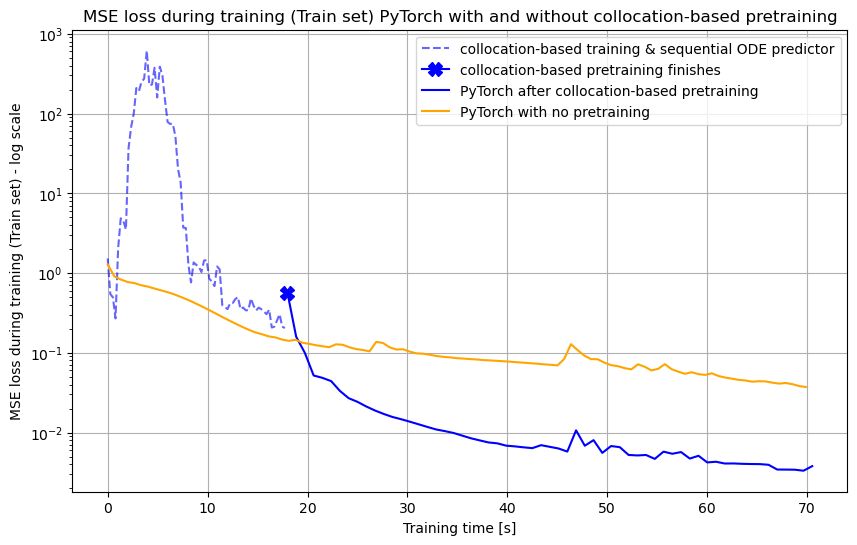

In [282]:
plt.figure(figsize=(10, 6))

plt.plot(pyomo_df.times.item(), pyomo_df.mse_odeint.item(), label='collocation-based training & sequential ODE predictor', color='blue', ls = '--', alpha = 0.6)
plt.plot(pt_df_pyomo_pretrain.times.item()[0], pt_df_pyomo_pretrain.training_loss.item()[0], label='collocation-based pretraining finishes', color='blue', marker = 'X', markersize = 10)
plt.plot(pt_df_pyomo_pretrain.times.item(), pt_df_pyomo_pretrain.training_loss.item(), label='PyTorch after collocation-based pretraining', color='blue')
plt.plot(pt_df_no_pretrain_600.times.item()[:105], pt_df_no_pretrain_600.training_loss.item()[:105], label='PyTorch with no pretraining', color='orange')
#plt.plot(pt_df_reg_pretrain_400.times.item()[:70], pt_df_reg_pretrain_400.training_loss.item()[:70], label='PyTorch with no pretraining', color='green')

plt.title('MSE loss during training (Train set) PyTorch with and without collocation-based pretraining')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Train set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

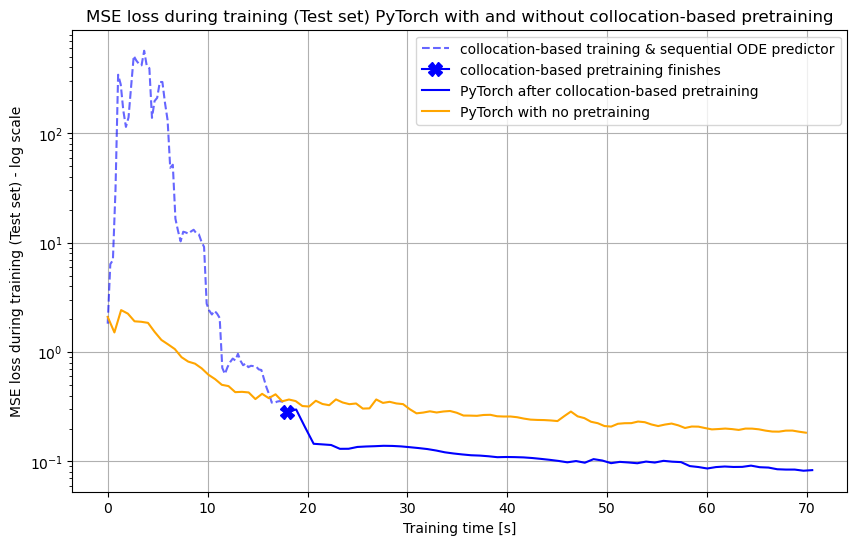

In [283]:
plt.figure(figsize=(10, 6))

plt.plot(pyomo_df.times.item(), pyomo_df.mse_odeint_test.item(), label='collocation-based training & sequential ODE predictor', color='blue', ls = '--', alpha = 0.6)
plt.plot(pt_df_pyomo_pretrain.times.item()[0], pt_df_pyomo_pretrain.testing_loss.item()[0], label='collocation-based pretraining finishes', color='blue', marker = 'X', markersize = 10)
plt.plot(pt_df_pyomo_pretrain.times.item(), pt_df_pyomo_pretrain.testing_loss.item(), label='PyTorch after collocation-based pretraining', color='blue')
plt.plot(pt_df_no_pretrain_600.times.item()[:105], pt_df_no_pretrain_600.testing_loss.item()[:105], label='PyTorch with no pretraining', color='orange')


plt.title('MSE loss during training (Test set) PyTorch with and without collocation-based pretraining')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Test set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Collocation-based ODE solver for Pyomo & sequential for Diffrax-JAX + Pytorch

In [3]:
pyomo_convergence = Results.load_results('results/convergence_2024-09-01_21-18-37_full.pkl')

keys = {k:k for k in pyomo_convergence[(1,'2015-01-10')].keys()}
pyomo_df = Results.collect_data(pyomo_convergence, keys)
# clean up the lists format
pyomo_df = pyomo_df.map(lambda x: x[0] if isinstance(x, list) else x) 
pyomo_df['i'] = 1
time_elpased = pyomo_df['times_elapsed'].values[-1]
pyomo_df = pyomo_df.groupby('i').agg(list)
pyomo_df['times_elapsed'] = time_elpased

pyomo_df.rename(columns={'times_elapsed':'time_elapsed', 'mse_coll_ode': 'training_loss'}, inplace=True)
Graphs_training.prepare_timings_general(pyomo_df)

,result,time_elapsed,mse_odeint,training_loss,mse_odeint_test,mse_coll_ode_test,times
i,,,,,,,
1,"[{'solver_time': 0.15732717514038086, 'termina...",4.480981,"[30.026100826567088, 0.4646257630579031, 0.428...","[8.253274204253774, 0.48164138618838664, 0.450...","[57.469554708860194, 39.45833324865588, 56.774...","[9.307059756383005, 9.130400054412963, 7.10615...","[0.0, 0.23584111113297312, 0.47168222226594625..."
